# **[earthquakes 2023 global](https://www.kaggle.com/datasets/mustafakeser4/earthquakes-2023-global)**

The dataset "earthquakes 2023 global" provides valuable information about earthquakes worldwide in the year 2023. This dataset includes various parameters such as time, location (latitude and longitude), depth, magnitude, magnitude type, and more. In this exploration, we will delve into the dataset to gain insights into the seismic activity observed throughout the year.

# **The dataset consists of the following columns:**

**Time**: Timestamp of the earthquake event.

**Latitude**: Geographic coordinate specifying the north-south position.

**Longitude**: Geographic coordinate specifying the east-west position.

**Depth**: Depth of the earthquake in kilometers.

**Mag**: Magnitude of the earthquake.

**MagType**: Type of magnitude measurement.

**Nst**: Number of seismic stations that reported the earthquake.

**Gap**: The gap between different seismic stations' coverage.

**Dmin**: Minimum distance to the earthquake epicenter for the nearest station.

**Rms**: Root Mean Square of the earthquake's amplitude spectrum.

**Net**: Network reporting the earthquake.

**Id**: Unique identifier for the earthquake event.

**Updated**: Timestamp indicating when the earthquake information was last updated.

**Place**: Location description of the earthquake.

**Type**: Type of seismic event (e.g., earthquake).

**HorizontalError**: Horizontal error in location determination.

**DepthError**: Error in depth determination.

**MagError**: Error in magnitude determination.

**MagNst**: Number of seismic stations used to calculate the magnitude.

**Status**: Status of the earthquake event (e.g., reviewed).

**LocationSource**: Source reporting the earthquake location.

**MagSource**: Source reporting the earthquake magnitude.

In [54]:
#This will install the pyspark package using the pip command, and the rest of the line after # will be treated as a comment.
!pip install pyspark

In [55]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [56]:
# Create or retrieve the SparkSession named 'spark'
spark

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Importing necessary libraries
import matplotlib.pyplot as plt  # Matplotlib for plotting
from pyspark import SparkConf, SparkContext  # Importing SparkConf and SparkContext from PySpark
from pyspark.sql import SparkSession, SQLContext  # Importing SparkSession and SQLContext from PySpark
from pyspark.sql.types import *  # Importing all types from PySpark SQL types module
import pyspark.sql.functions as F  # Importing PySpark SQL functions module as F
from pyspark.sql.functions import col, sum  # Importing specific functions from PySpark SQL functions module
import seaborn as sns  # Importing Seaborn for statistical data visualization
from pyspark.sql.types import IntegerType  # Importing IntegerType from PySpark SQL types module

In [59]:
# Reading a CSV file into a Spark DataFrame
df = spark.read.csv('/content/drive/MyDrive/earthquakes_2023_global.csv',header=True)

In [60]:
# Displaying the first 10 rows of the Spark DataFrame
df.show(10)

+--------------------+----------+------------+-------+----+-------+----+-----+-------+----+---+------------+--------------------+--------------------+----------+---------------+----------+--------+------+--------+--------------+---------+
|                time|  latitude|   longitude|  depth| mag|magType| nst|  gap|   dmin| rms|net|          id|             updated|               place|      type|horizontalError|depthError|magError|magNst|  status|locationSource|magSource|
+--------------------+----------+------------+-------+----+-------+----+-----+-------+----+---+------------+--------------------+--------------------+----------+---------------+----------+--------+------+--------+--------------+---------+
|2023-01-01T00:49:...|   52.0999|    178.5218|  82.77| 3.1|     ml|14.0|139.0|   0.87|0.18| us|  us7000j5a1|2023-03-11T22:51:...|Rat Islands, Aleu...|earthquake|           8.46|    21.213|   0.097|  14.0|reviewed|            us|       us|
|2023-01-01T01:41:...|    7.1397|     126.73

# **Exploratory Data** **Analysis**

In [61]:
print("earthquakes 2023 global Count",df.filter(df['magType']=='ml').select('magType').count())
print("earthquakes 2023 global Not Count",df.filter(df['magType']=='mb').select('magType').count())

earthquakes 2023 global Count 6522
earthquakes 2023 global Not Count 15906


In [62]:
# Filtering the DataFrame to include only rows where magType is 'ml', computing descriptive statistics, and displaying the results
df.filter(df['magType']=='ml').describe().show()

+-------+--------------------+------------------+-------------------+------------------+------------------+-------+------------------+-----------------+------------------+-------------------+----+------------+--------------------+--------------------+------------+-----------------+------------------+-------------------+------------------+---------+--------------+---------+
|summary|                time|          latitude|          longitude|             depth|               mag|magType|               nst|              gap|              dmin|                rms| net|          id|             updated|               place|        type|  horizontalError|        depthError|           magError|            magNst|   status|locationSource|magSource|
+-------+--------------------+------------------+-------------------+------------------+------------------+-------+------------------+-----------------+------------------+-------------------+----+------------+--------------------+------------------

In [63]:
# Filtering the DataFrame to include only rows where magType is 'mb', computing descriptive statistics, and displaying the results
df.filter(df['magType']=='mb').describe().show()

+-------+--------------------+-----------------+------------------+------------------+-------------------+-------+-----------------+------------------+------------------+-------------------+-----+------------+--------------------+--------------------+-----------------+-----------------+------------------+--------------------+-----------------+--------+--------------+---------+
|summary|                time|         latitude|         longitude|             depth|                mag|magType|              nst|               gap|              dmin|                rms|  net|          id|             updated|               place|             type|  horizontalError|        depthError|            magError|           magNst|  status|locationSource|magSource|
+-------+--------------------+-----------------+------------------+------------------+-------------------+-------+-----------------+------------------+------------------+-------------------+-----+------------+--------------------+----------

In [64]:
# Grouping the DataFrame by 'magType', aggregating the sum of 'mag',
# sorting the result in descending order, and displaying the top 5 rows
df.groupBy('magType').agg({'mag':'sum'}).sort('sum(mag)', ascending=False).show(5)

+-------+------------------+
|magType|          sum(mag)|
+-------+------------------+
|     mb| 70512.79999999992|
|     ml|19393.240000000078|
|     md| 6717.560000199991|
|    mww| 6445.400000000007|
|    mwr| 2710.999999999996|
+-------+------------------+
only showing top 5 rows



In [65]:
# Grouping the DataFrame by 'latitude', aggregating the sum of 'mag' and 'gap',
# sorting the result in descending order, and displaying the top 5 rows
df.groupBy('latitude').agg({'mag': 'sum', 'gap': 'sum'}).sort('sum(mag)', ascending=False).show(5)

+--------+--------+--------+
|latitude|sum(mag)|sum(gap)|
+--------+--------+--------+
| -5.5979|    18.0|   384.0|
| 12.6602|    18.0|   490.0|
| 36.8907|    18.0|   374.0|
|-23.0379|    18.0|   722.0|
| -4.6561|    17.6|   429.0|
+--------+--------+--------+
only showing top 5 rows



In [66]:
# Grouping the DataFrame by 'longitude', counting the number of occurrences,
# sorting the result in descending order, and displaying the top 5 rows
df.groupBy('longitude').count().sort('count', ascending=False).show(5)

+------------+-----+
|   longitude|count|
+------------+-----+
|     -66.958|    5|
|-100.6529869|    5|
|    126.4196|    4|
|-100.6594179|    4|
|    127.1388|    4|
+------------+-----+
only showing top 5 rows



In [67]:
# Grouping the DataFrame by 'latitude', counting the number of occurrences,
# sorting the result in descending order, and displaying the top 5 rows
df.groupBy('latitude').count().sort('count', ascending=False).show(5)

+-----------+-----+
|   latitude|count|
+-----------+-----+
|32.75115967|    5|
|     31.641|    5|
|     31.626|    4|
|    17.9435|    4|
|    17.9275|    4|
+-----------+-----+
only showing top 5 rows



In [68]:
# Grouping the DataFrame by 'Size', counting the number of occurrences,
# sorting the result in descending order, and displaying the top 5 rows
df.groupBy('id').count().sort('count', ascending=False).show(5)

+----------+-----+
|        id|count|
+----------+-----+
|us7000jlxd|    2|
|us7000lgp7|    2|
|us6000k0v1|    2|
|us7000kulb|    2|
|us7000lenu|    2|
+----------+-----+
only showing top 5 rows



In [69]:
# Grouping the DataFrame by 'Size', counting the number of occurrences,
# sorting the result in descending order, and displaying the top 5 rows
df.groupBy('place').count().sort('count', ascending=False).show(15)

+--------------------+-----+
|               place|count|
+--------------------+-----+
|                NULL| 1608|
|Izu Islands, Japa...|  358|
|south of the Fiji...|  351|
|South Sandwich Is...|  327|
|Rat Islands, Aleu...|  323|
|southeast of the ...|  302|
|         Fiji region|  256|
|Kermadec Islands ...|  217|
|  Puerto Rico region|  206|
|Maug Islands regi...|  184|
|           Banda Sea|  177|
|Kermadec Islands,...|  157|
|Andreanof Islands...|  142|
|south of the Kerm...|   99|
|     Reykjanes Ridge|   91|
+--------------------+-----+
only showing top 15 rows



In [70]:
# Grouping the DataFrame by 'depth' and 'time', counting the number of occurrences,
# sorting the result in descending order, and displaying the top 5 rows
df.groupBy('depth', 'time').count().sort('count', ascending=False).show(5)

+-------+--------------------+-----+
|  depth|                time|count|
+-------+--------------------+-----+
| 20.812|2023-03-03T18:32:...|    2|
| 85.865|2023-08-11T21:45:...|    2|
| 65.021|2023-04-06T01:08:...|    2|
|   10.0|2023-04-08T17:06:...|    2|
|184.607|2023-08-03T05:39:...|    2|
+-------+--------------------+-----+
only showing top 5 rows



# **Histogram**


Histograms are widely used in various fields for visualizing the distribution of a dataset.

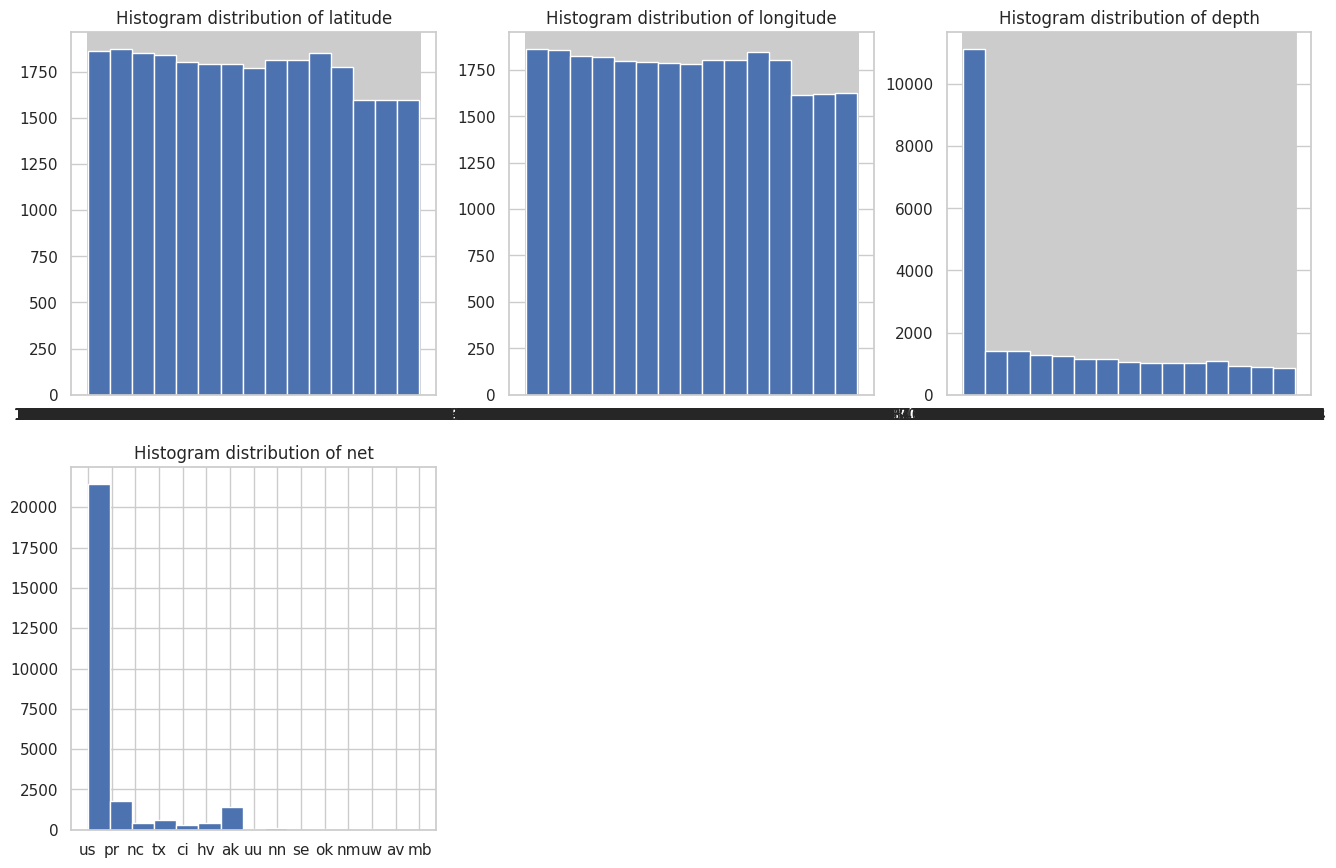

In [71]:
# Converting the Spark DataFrame to a Pandas DataFrame
df_pandas = df.toPandas()

# Selecting numeric columns of interest
numeric_columns = ['latitude', 'longitude', 'depth', 'net']

# Creating a figure with a specific size
plt.figure(figsize=(16, 12))

# Plotting histograms for each numeric column
for i, column in zip(range(1, 11), numeric_columns):
    plt.subplot(4, 3, i)
    plt.subplots_adjust(right=0.9, top=1.5)
    plt.hist(df_pandas[column], bins=15)
    plt.title('Histogram distribution of {}'.format(column))

# Displaying the plots
plt.show()

# **Piechart**

Pie charts are used to represent data in a circular graph, where each category or slice of the pie represents a proportion of the whole.

In [72]:
# Define a function to create a pie chart
def pieplot(df, col, lim=10, yname=None):
    # Grouping the DataFrame by the specified column and counting occurrences
    classes = df.groupBy(col).count().orderBy('count', ascending=False)

    # Converting the result to a Pandas DataFrame and limiting to the specified number of classes
    pd_df = classes.limit(lim).toPandas()

    # Plotting a pie chart using Pandas plotting functionality
    pd_df.plot(kind='pie', x=col, y='count', labels=pd_df[col], legend=False, subplots=True)

    # Adding a title to the pie chart
    plt.title('Piechart analysis of {}'.format(col))

    # Displaying the plot
    plt.show()

<Figure size 2000x2000 with 0 Axes>

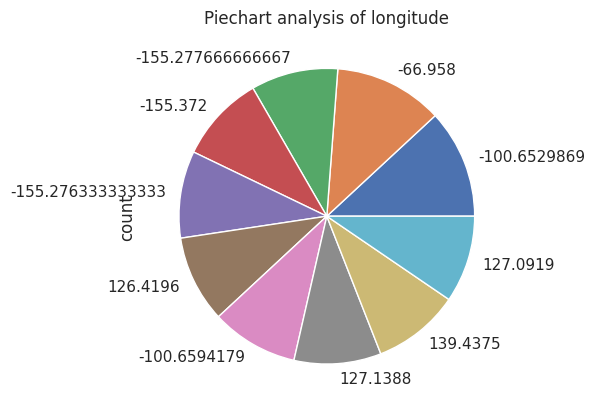

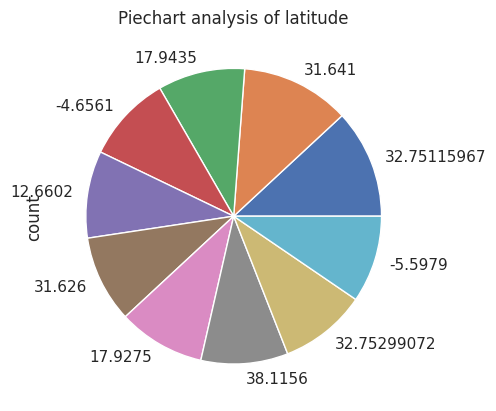

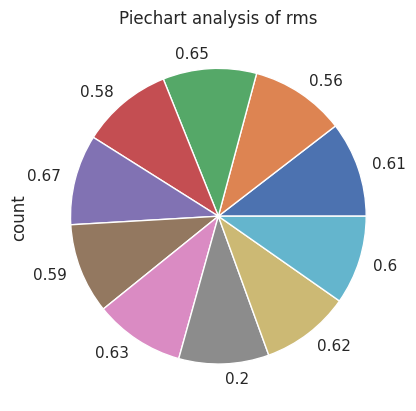

In [73]:
# Specifying categorical columns for pie charts
columns_cat = ['longitude','latitude','rms']

# Creating a figure with a specific size
plt.figure(figsize=(20, 20))

# Looping through each categorical column and creating a pie chart
for column in columns_cat:
    pieplot(df, column)

# **Donut chart**


Donut charts are a type of data visualization that is used to represent information in a circular format. They are similar to pie charts but have a hole in the center, creating a "donut" shape.

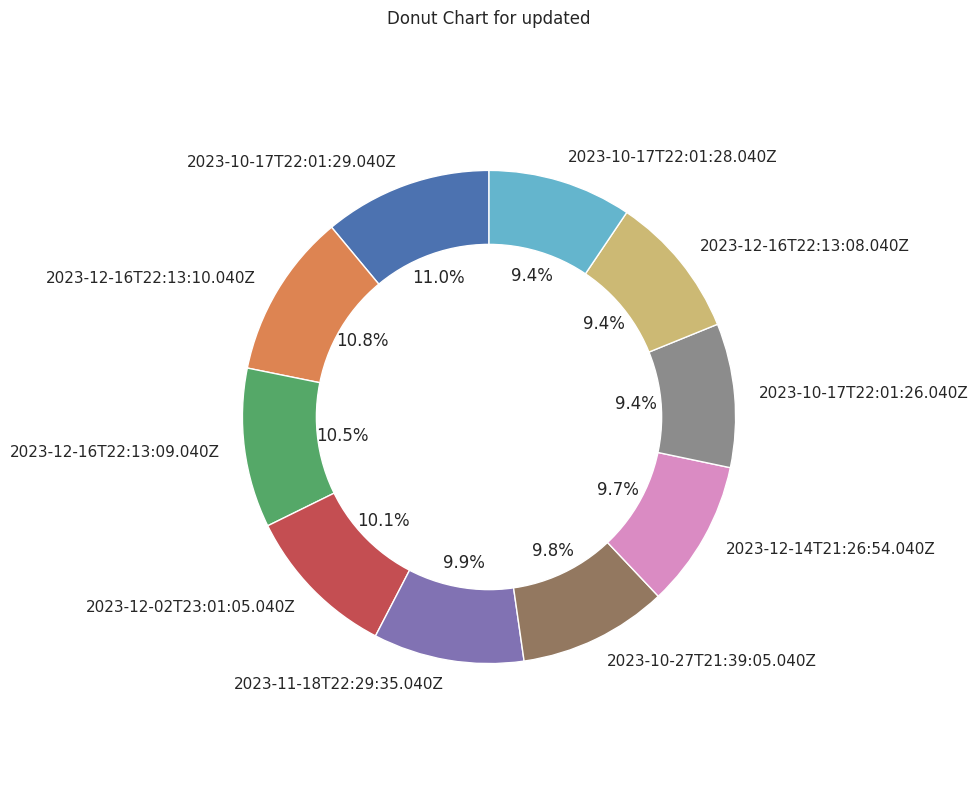

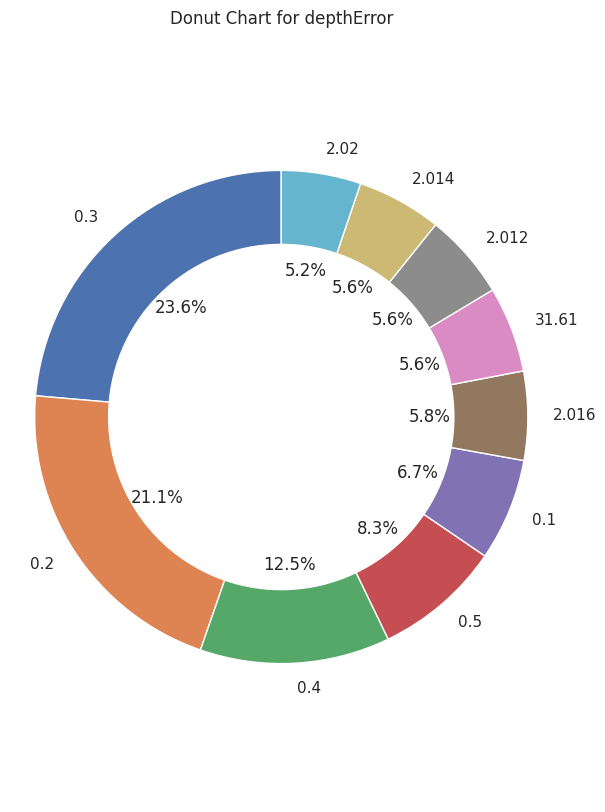

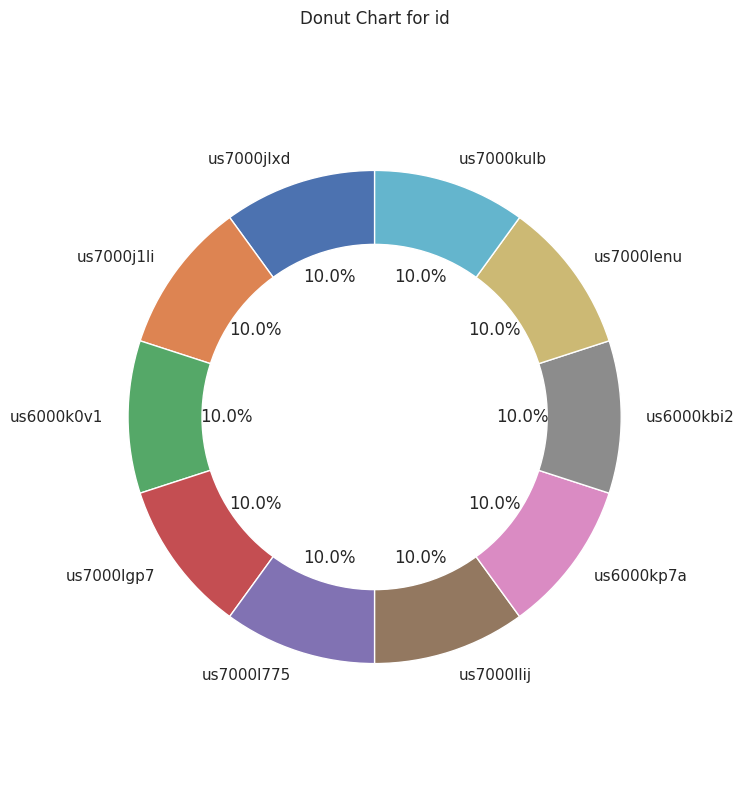

In [74]:
import matplotlib.pyplot as plt

def donut_chart(data, col, lim=10):
    classes = data.groupBy(col).count().orderBy('count', ascending=False)
    pd_df = classes.limit(lim).toPandas()

    # Creating a figure with a specific size
    plt.figure(figsize=(7, 10))

    # Plotting the donut chart
    plt.pie(pd_df['count'], labels=pd_df[col], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

    # Draw a white circle at the center to create the donut effect
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Set aspect ratio to be equal for a circular donut chart
    plt.axis('equal')

    # Set the title
    plt.title(f'Donut Chart for {col}')

    # Show the donut chart
    plt.show()

# Specify categorical columns for donut charts
columns_cat = ['updated','depthError','id']

# Loop through each categorical column and create a donut chart
for column in columns_cat:
    donut_chart(df, column)

# **Bar chart**

Bar charts are commonly used in data visualization for several reasons.

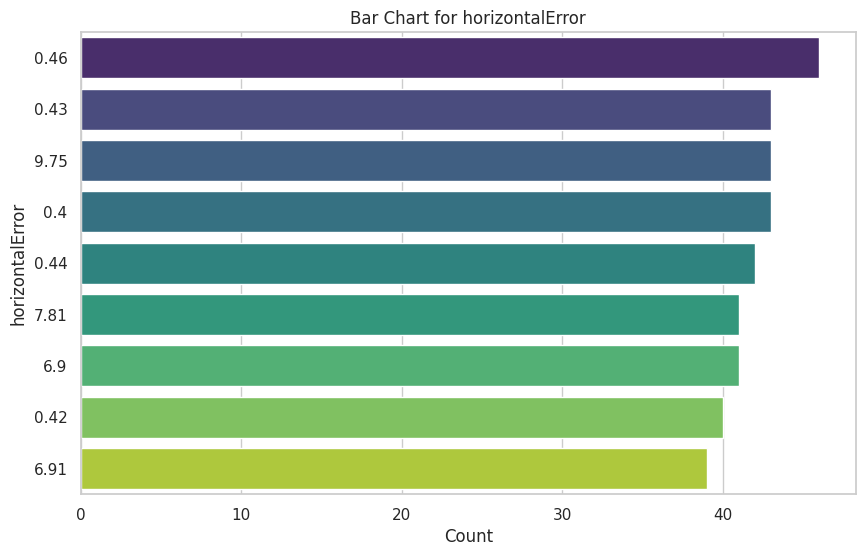

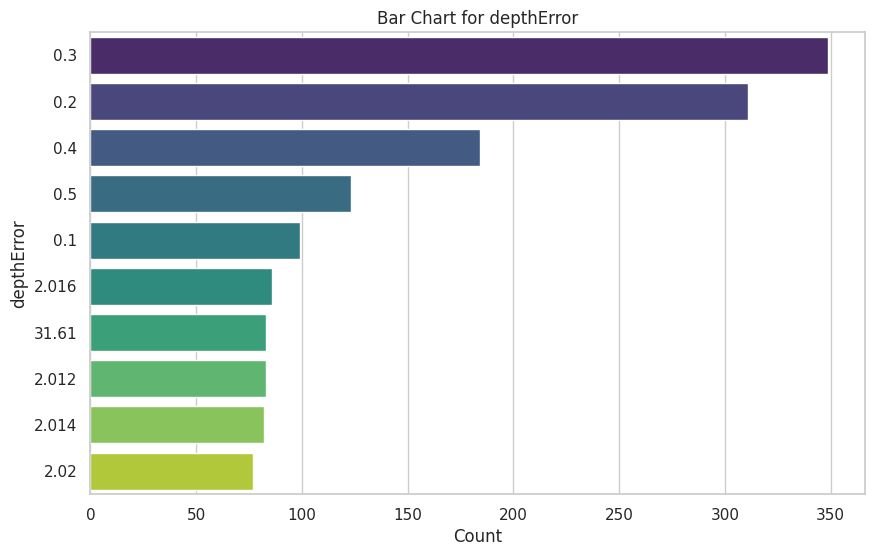

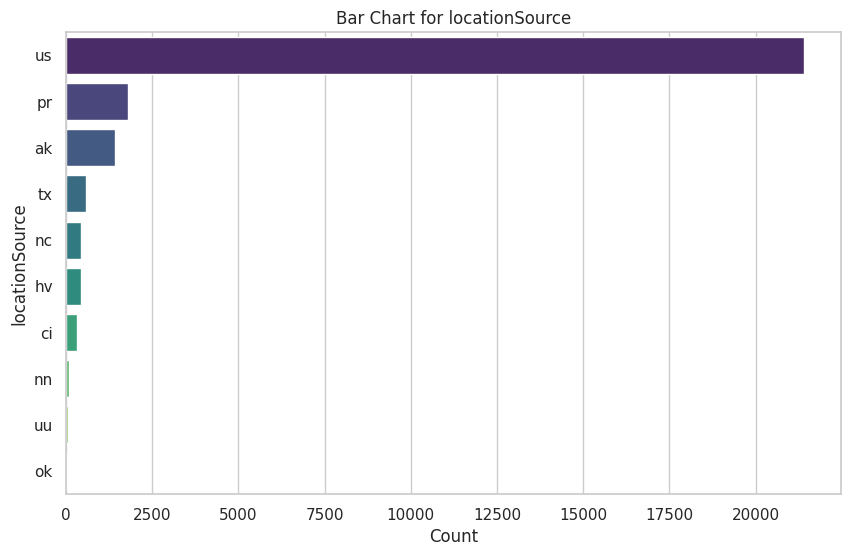

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F

def bar_chart(data, col, lim=10):
    # Grouping data by the specified column and counting occurrences
    classes = data.groupBy(col).count().orderBy('count', ascending=False)
    pd_df = classes.limit(lim).toPandas()

    # Creating a figure with a specific size
    plt.figure(figsize=(10, 6))

    # Plotting the bar chart
    sns.barplot(x='count', y=col, data=pd_df, palette='viridis')

    # Setting the title and labels
    plt.title(f'Bar Chart for {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

    # Show the bar chart
    plt.show()

# Specify categorical columns for bar charts
columns_cat = ['horizontalError', 'depthError','locationSource']

# Loop through each categorical column and create a bar chart
for column in columns_cat:
    bar_chart(df, column)

# **Violin Chart**

A violin chart, also known as a violin plot, is a type of data visualization that combines aspects of a box plot and a kernel density plot. It is often used to display the distribution of a continuous variable across different categories or groups.

In [76]:
import pandas as pd
earthquakes_2023_global = pd.read_csv('earthquakes_2023_global.csv')

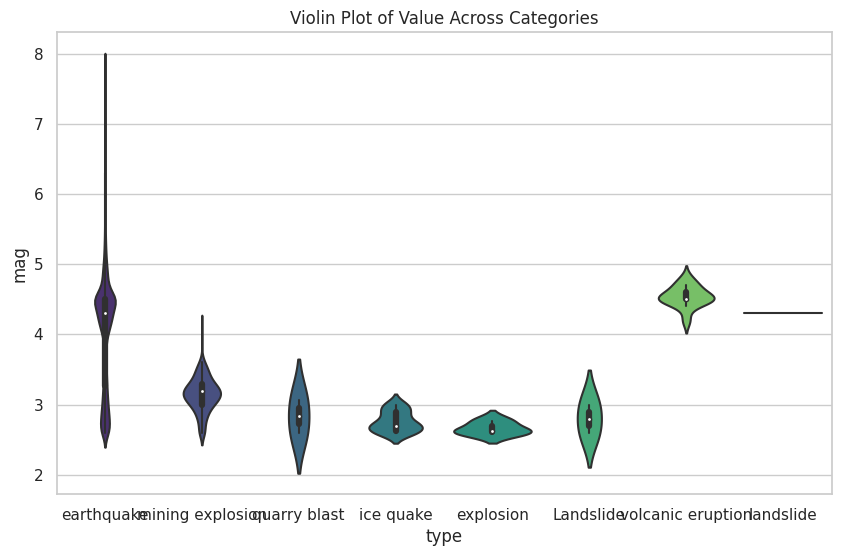

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a Pandas DataFrame with a 'type' column and a 'mag' column
# Replace 'earthquakes_2023_global' with your actual DataFrame
# Example data generation:
# import pandas as pd
# import numpy as np
# np.random.seed(42)
# earthquakes_2023_global = pd.DataFrame({'type': np.random.choice(['A', 'B', 'C'], size=100),
#                            'mag': np.random.randn(100)})

# Create a violin plot using Seaborn
sns.set(style="whitegrid")  # Optional: Set the style

plt.figure(figsize=(10, 6))  # Optional: Set the figure size

sns.violinplot(x='type', y='mag', data=earthquakes_2023_global, palette='viridis')

# Optional: Customize the plot
plt.title('Violin Plot of Value Across Categories')
plt.xlabel('type')
plt.ylabel('mag')

# Show the plot
plt.show()


# **Scatter plot**

Scatter plots are a type of data visualization that is commonly used in statistics and data analysis.

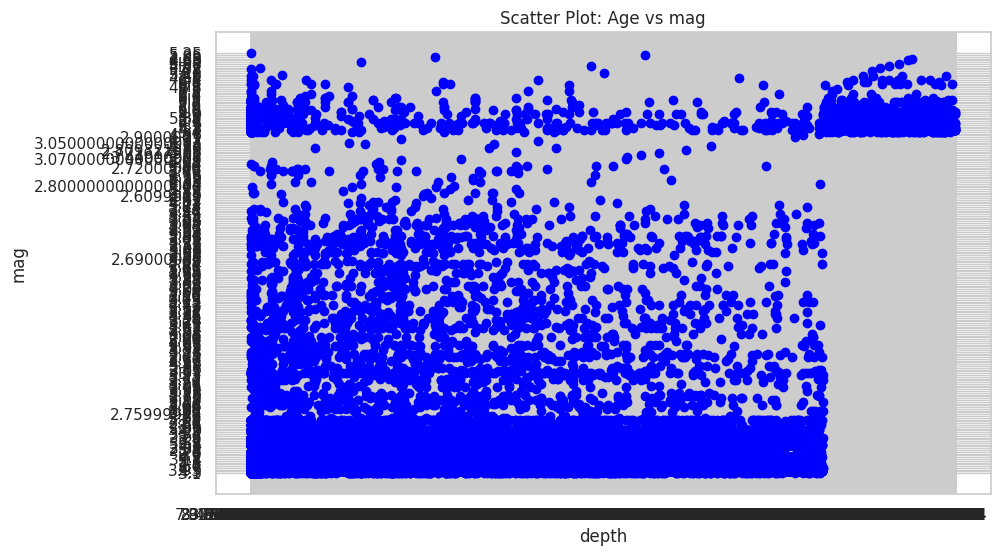

In [78]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder.appName("PySpark Scatter Plot").getOrCreate()

columns = ["depth", "mag"]

# Extracting data for scatter plot
age_rating_data = df.select("depth", "mag").toPandas()

# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(age_rating_data["depth"], age_rating_data["mag"], color='blue')
plt.title('Scatter Plot: Age vs mag')
plt.xlabel('depth')
plt.ylabel('mag')
plt.show()

# Stop the Spark session
spark.stop()

# **Line chart**

Line charts are commonly used in data visualization for several reasons

In [80]:
def line_chart(depthError, horizontalError):
    pd_df = data.toPandas()

    # Creating a figure with a specific size
    plt.figure(figsize=(10, 6))

    # Plotting the line chart
    sns.lineplot(x=depthError, y=horizontalError, data=pd_df, marker='o', color='purple')

    # Setting the title and labels
    plt.title(f'Line Chart: {horizontalError} over {depthError}')
    plt.xlabel(depthError)
    plt.ylabel(horizontalError)

    # Show the line chart
    plt.show()

In [81]:
# Displaying information about the Pandas DataFrame
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26642 entries, 0 to 26641
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   time             26642 non-null  object
 1   latitude         26642 non-null  object
 2   longitude        26642 non-null  object
 3   depth            26642 non-null  object
 4   mag              26642 non-null  object
 5   magType          26642 non-null  object
 6   nst              25227 non-null  object
 7   gap              25225 non-null  object
 8   dmin             24776 non-null  object
 9   rms              26642 non-null  object
 10  net              26642 non-null  object
 11  id               26642 non-null  object
 12  updated          26642 non-null  object
 13  place            25034 non-null  object
 14  type             26642 non-null  object
 15  horizontalError  25093 non-null  object
 16  depthError       26642 non-null  object
 17  magError         24970 non-null

In [82]:
# Importing Pandas
import pandas as pd

# Specifying numeric columns
numeric_columns = ['latitude', 'longitude', 'depth', 'mag', 'rms']

# Converting specified columns to numeric, handling non-convertible values with 'coerce'
for column in numeric_columns:
    df_pandas[column] = pd.to_numeric(df_pandas[column], errors='coerce')

# Displaying the data types after conversion
print(df_pandas.dtypes)

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                 object
gap                 object
dmin                object
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError     object
depthError          object
magError            object
magNst              object
status              object
locationSource      object
magSource           object
dtype: object


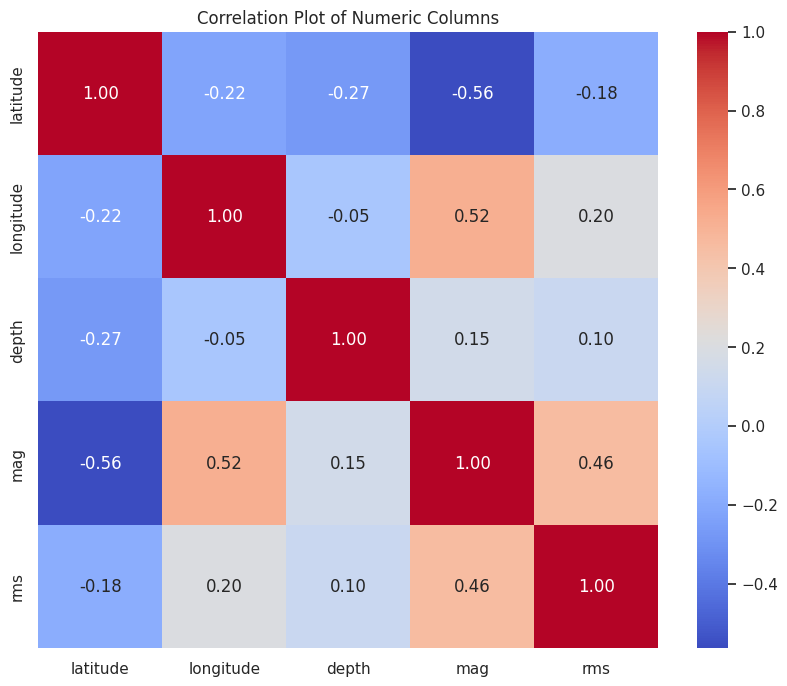

In [83]:
# Converting specified columns to numeric, handling non-convertible values with 'coerce'
for column in numeric_columns:
    df_pandas[column] = pd.to_numeric(df_pandas[column], errors='coerce')

# Calculating the correlation matrix for numeric columns
correlation_matrix = df_pandas[numeric_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))

# Using Seaborn to create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Adding a title to the correlation plot
plt.title('Correlation Plot of Numeric Columns')

# Displaying the plot
plt.show()

# **Data preprocessing and investigation**

In [85]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("Colab") \
    .getOrCreate()

In [84]:
# Sample PySpark operations
df = spark.read.csv('/content/drive/MyDrive/earthquakes_2023_global.csv',header=True)
df.show(5)

+--------------------+--------+---------+------+----+-------+----+-----+------+----+---+------------+--------------------+--------------------+----------+---------------+----------+--------+------+--------+--------------+---------+
|                time|latitude|longitude| depth| mag|magType| nst|  gap|  dmin| rms|net|          id|             updated|               place|      type|horizontalError|depthError|magError|magNst|  status|locationSource|magSource|
+--------------------+--------+---------+------+----+-------+----+-----+------+----+---+------------+--------------------+--------------------+----------+---------------+----------+--------+------+--------+--------------+---------+
|2023-01-01T00:49:...| 52.0999| 178.5218| 82.77| 3.1|     ml|14.0|139.0|  0.87|0.18| us|  us7000j5a1|2023-03-11T22:51:...|Rat Islands, Aleu...|earthquake|           8.46|    21.213|   0.097|  14.0|reviewed|            us|       us|
|2023-01-01T01:41:...|  7.1397|  126.738|79.194| 4.5|     mb|32.0|104.0|

In [86]:
df.count() # number of rows

26642

In [88]:
# Sample PySpark operations
df = spark.read.csv('/content/drive/MyDrive/earthquakes_2023_global.csv',header=True)
df.show(5)

+--------------------+--------+---------+------+----+-------+----+-----+------+----+---+------------+--------------------+--------------------+----------+---------------+----------+--------+------+--------+--------------+---------+
|                time|latitude|longitude| depth| mag|magType| nst|  gap|  dmin| rms|net|          id|             updated|               place|      type|horizontalError|depthError|magError|magNst|  status|locationSource|magSource|
+--------------------+--------+---------+------+----+-------+----+-----+------+----+---+------------+--------------------+--------------------+----------+---------------+----------+--------+------+--------+--------------+---------+
|2023-01-01T00:49:...| 52.0999| 178.5218| 82.77| 3.1|     ml|14.0|139.0|  0.87|0.18| us|  us7000j5a1|2023-03-11T22:51:...|Rat Islands, Aleu...|earthquake|           8.46|    21.213|   0.097|  14.0|reviewed|            us|       us|
|2023-01-01T01:41:...|  7.1397|  126.738|79.194| 4.5|     mb|32.0|104.0|

In [87]:
# Dropping the "id" column from the Spark DataFrame
df = df.drop("id")

In [89]:
# Printing the schema of the Spark DataFrame
df.printSchema()

root
 |-- time: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- depth: string (nullable = true)
 |-- mag: string (nullable = true)
 |-- magType: string (nullable = true)
 |-- nst: string (nullable = true)
 |-- gap: string (nullable = true)
 |-- dmin: string (nullable = true)
 |-- rms: string (nullable = true)
 |-- net: string (nullable = true)
 |-- id: string (nullable = true)
 |-- updated: string (nullable = true)
 |-- place: string (nullable = true)
 |-- type: string (nullable = true)
 |-- horizontalError: string (nullable = true)
 |-- depthError: string (nullable = true)
 |-- magError: string (nullable = true)
 |-- magNst: string (nullable = true)
 |-- status: string (nullable = true)
 |-- locationSource: string (nullable = true)
 |-- magSource: string (nullable = true)



In [91]:
# Importing necessary types from PySpark
from pyspark.sql.types import StringType, BooleanType, IntegerType, FloatType

# Specifying numeric columns
numeric_cols = ['latitude', 'longitude', 'depth', 'mag', 'rms']

# Iterating through numeric columns and casting them to IntegerType
for column in numeric_cols:
    df = df.withColumn(column, F.col(column).cast(IntegerType()))

In [90]:
# Printing the schema of the Spark DataFrame after casting numeric columns to IntegerType
df.printSchema()

root
 |-- time: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- depth: string (nullable = true)
 |-- mag: string (nullable = true)
 |-- magType: string (nullable = true)
 |-- nst: string (nullable = true)
 |-- gap: string (nullable = true)
 |-- dmin: string (nullable = true)
 |-- rms: string (nullable = true)
 |-- net: string (nullable = true)
 |-- id: string (nullable = true)
 |-- updated: string (nullable = true)
 |-- place: string (nullable = true)
 |-- type: string (nullable = true)
 |-- horizontalError: string (nullable = true)
 |-- depthError: string (nullable = true)
 |-- magError: string (nullable = true)
 |-- magNst: string (nullable = true)
 |-- status: string (nullable = true)
 |-- locationSource: string (nullable = true)
 |-- magSource: string (nullable = true)



In [92]:
# Computing summary statistics for the Spark DataFrame and displaying the results
df.describe().show()

+-------+--------------------+------------------+-------------------+------------------+------------------+-------+-----------------+------------------+------------------+-------------------+-----+------------+--------------------+--------------------+-----------------+-----------------+-----------------+------------------+------------------+---------+--------------+---------+
|summary|                time|          latitude|          longitude|             depth|               mag|magType|              nst|               gap|              dmin|                rms|  net|          id|             updated|               place|             type|  horizontalError|       depthError|          magError|            magNst|   status|locationSource|magSource|
+-------+--------------------+------------------+-------------------+------------------+------------------+-------+-----------------+------------------+------------------+-------------------+-----+------------+--------------------+---------

# **Dealing with missing values**

In [95]:
# Check For missing values
df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df.columns)).show()

+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+
|time|latitude|longitude|depth|mag|magType| nst| gap|dmin|rms|net| id|updated|place|type|horizontalError|depthError|magError|magNst|status|locationSource|magSource|
+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+
|   0|       0|        0|    0|  0|      0|1415|1417|1866|  0|  0|  0|      0| 1608|   0|           1549|         0|    1672|  1577|     0|             0|        0|
+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+



In [94]:
# Check the count of missing values in each column
missing_counts = df.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df.columns])
missing_counts.show()

+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+
|time|latitude|longitude|depth|mag|magType| nst| gap|dmin|rms|net| id|updated|place|type|horizontalError|depthError|magError|magNst|status|locationSource|magSource|
+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+
|   0|       0|        0|    0|  0|      0|1415|1417|1866|  0|  0|  0|      0| 1608|   0|           1549|         0|    1672|  1577|     0|             0|        0|
+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+



In [93]:
# Counting the number of null values for each column in the Spark DataFrame
null_counts = [sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]

# Selecting and displaying the results
df.select(*null_counts).show()

+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+
|time|latitude|longitude|depth|mag|magType| nst| gap|dmin|rms|net| id|updated|place|type|horizontalError|depthError|magError|magNst|status|locationSource|magSource|
+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+
|   0|       0|        0|    0|  0|      0|1415|1417|1866|  0|  0|  0|      0| 1608|   0|           1549|         0|    1672|  1577|     0|             0|        0|
+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+



In [96]:
# Importing necessary functions from PySpark
from pyspark.sql.functions import when, lit

# Defining a function to fill missing values in numerical columns with mean values
def filling_numerical_column(data, numeric_cols):
    # Calculating mean values for each numeric column
    column_mean = compute_mean(data, numeric_cols)

    # Iterating through each numeric column and filling missing values with mean
    for i, mean in column_mean:
        data = data.withColumn(i, when(data[i].isNull()==True, lit(mean)).otherwise(data[i]))

    # Returning the modified DataFrame
    return data

In [97]:
from pyspark.sql import functions as F

def compute_mean(data, numeric_cols):
    """
    Compute the mean values for numeric columns in a PySpark DataFrame.

    Parameters:
    - data: PySpark DataFrame
    - numeric_cols: List of numeric column names

    Returns:
    - Dictionary containing column names and their corresponding mean values
    """
    means = {}
    for col in numeric_cols:
        mean_value = data.agg({col: 'mean'}).collect()[0][0]
        means[col] = mean_value
    return means

def filling_numerical_column(data, numeric_cols):
    """
    Fill missing values in numeric columns with their mean values.

    Parameters:
    - data: PySpark DataFrame
    - numeric_cols: List of numeric column names

    Returns:
    - PySpark DataFrame with missing values filled with mean values
    """
    # Calculating mean values for each numeric column
    column_mean = compute_mean(data, numeric_cols)

    # Iterating through each numeric column and filling missing values with mean
    for col in numeric_cols:
        data = data.withColumn(col, F.when(data[col].isNull(), column_mean[col]).otherwise(data[col]))

    return data

# Example usage
num_cols = ['latitude', 'longitude', 'depth', 'mag', 'rms']
df = filling_numerical_column(df, num_cols)

In [98]:
df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df.columns)).show()

+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+
|time|latitude|longitude|depth|mag|magType| nst| gap|dmin|rms|net| id|updated|place|type|horizontalError|depthError|magError|magNst|status|locationSource|magSource|
+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+
|   0|       0|        0|    0|  0|      0|1415|1417|1866|  0|  0|  0|      0| 1608|   0|           1549|         0|    1672|  1577|     0|             0|        0|
+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+



In [100]:
df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df.columns)).show()

+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+
|time|latitude|longitude|depth|mag|magType| nst| gap|dmin|rms|net| id|updated|place|type|horizontalError|depthError|magError|magNst|status|locationSource|magSource|
+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+
|   0|       0|        0|    0|  0|      0|1415|1417|1866|  0|  0|  0|      0| 1608|   0|           1549|         0|    1672|  1577|     0|             0|        0|
+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+



In [99]:
# Defining a function to fill missing values in categorical columns with mode values
def filling_categorical_column(data, list_cat_columns, verbose=False):
    fil_cat_col = []

    # Iterating through each categorical column
    for col in list_cat_columns:
        # Filtering out rows where the categorical column is not null
        data = data.filter(data[col].isNull() == False)

        # Finding unique classes and their counts in the column
        unique_classes = data.select(col).distinct().rdd.map(lambda x: x[0]).collect()
        unique_values = []

        # Counting occurrences of each unique class in the column
        for uc in unique_classes:
            unique_values.append([uc, data.filter(data[col] == uc).count()])

        # Sorting unique classes by count in descending order
        sorted_unique_values = sorted(unique_values, key=lambda x: x[1], reverse=True)

        # Printing information if verbose is True
        if verbose:
            print(col, sorted_unique_values, " and mode is ", sorted_unique_values[0][0])

        # Appending column and its mode to the result list
        fil_cat_col.append([col, sorted_unique_values[0][0]])

    # Returning the result list
    return fil_cat_col

In [101]:
# Filling missing values in specified categorical columns with mode values and displaying information
list_cat_columns = ['magType', 'type', 'locationSource', 'magSource']
filling_categorical_column(df, list_cat_columns, verbose=True)

magType [['mb', 15906], ['ml', 6522], ['md', 2117], ['mww', 1185], ['mwr', 616], ['ml(texnet)', 134], ['mw', 87], ['mb_lg', 60], ['mlr', 4], ['mwb', 3], ['mh', 3], ['mlv', 2], ['ms_vx', 1], ['mwp', 1], ['mwc', 1]]  and mode is  mb
type [['earthquake', 26428], ['mining explosion', 167], ['ice quake', 26], ['volcanic eruption', 13], ['explosion', 3], ['Landslide', 2], ['quarry blast', 2], ['landslide', 1]]  and mode is  earthquake
locationSource [['us', 21409], ['pr', 1806], ['ak', 1416], ['tx', 581], ['nc', 433], ['hv', 430], ['ci', 319], ['nn', 91], ['uu', 45], ['ok', 43], ['uw', 38], ['nm', 15], ['se', 7], ['av', 7], ['dnk', 1], ['mb', 1]]  and mode is  us
magSource [['us', 21249], ['pr', 1806], ['ak', 1435], ['tx', 581], ['nc', 433], ['hv', 430], ['ci', 319], ['guc', 129], ['nn', 91], ['uu', 45], ['ok', 42], ['uw', 38], ['nm', 15], ['slm', 7], ['se', 7], ['av', 7], ['pgc', 6], ['zamg', 1], ['mb', 1]]  and mode is  us


[['magType', 'mb'],
 ['type', 'earthquake'],
 ['locationSource', 'us'],
 ['magSource', 'us']]

In [102]:
# Counting the number of null values for each column in the Spark DataFrame and displaying the results
df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df.columns)).show()

+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+
|time|latitude|longitude|depth|mag|magType| nst| gap|dmin|rms|net| id|updated|place|type|horizontalError|depthError|magError|magNst|status|locationSource|magSource|
+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+
|   0|       0|        0|    0|  0|      0|1415|1417|1866|  0|  0|  0|      0| 1608|   0|           1549|         0|    1672|  1577|     0|             0|        0|
+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+



# **Dealing with outliers**

Outliers are data points that significantly deviate from the overall pattern of a dataset. Dealing with outliers is crucial in data analysis to ensure that they do not unduly influence statistical analyses or model performance.

In [103]:
class Outlier():

    def __init__(self, df):
        self.df = df

    def _calculate_bounds(self):
        # Calculating bounds for each numeric column
        bounds = {
            c: dict(
                zip(["q1", "q3"], self.df.approxQuantile(c, [0.25, 0.75], 0))
            )
            for c, d in zip(self.df.columns, self.df.dtypes) if d[1] in ["bigint", "double"]
        }

        # Adjusting bounds based on IQR for each column
        for c in bounds:
            iqr = bounds[c]['q3'] - bounds[c]['q1']
            bounds[c]['min'] = bounds[c]['q1'] - (iqr * 1.5)
            bounds[c]['max'] = bounds[c]['q3'] + (iqr * 1.5)

        return bounds

    def _flag_outliers_df(self):
        # Calculating bounds
        bounds = self._calculate_bounds()

        # Creating a list of conditions to flag outliers
        outliers_col = [
            f.when(
                ~f.col(c).between(bounds[c]['min'], bounds[c]['max']),
                f.col(c)
            ).alias(c + '_outlier')
            for c in bounds]

        # Selecting columns with flagged outliers
        return self.df.select(*outliers_col)

    def show_outliers(self):
        # Creating a DataFrame with flagged outliers
        outlier_df = self._flag_outliers_df()

        # Displaying columns with flagged outliers
        for outlier in outlier_df.columns:
            outlier_df.select(outlier).filter(f.col(outlier).isNotNull()).show()

In [104]:
df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df.columns)).show()

+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+
|time|latitude|longitude|depth|mag|magType| nst| gap|dmin|rms|net| id|updated|place|type|horizontalError|depthError|magError|magNst|status|locationSource|magSource|
+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+
|   0|       0|        0|    0|  0|      0|1415|1417|1866|  0|  0|  0|      0| 1608|   0|           1549|         0|    1672|  1577|     0|             0|        0|
+----+--------+---------+-----+---+-------+----+----+----+---+---+---+-------+-----+----+---------------+----------+--------+------+------+--------------+---------+



In [105]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Create a Spark session
spark = SparkSession.builder.appName("OutlierExample").getOrCreate()

# Load your data into a DataFrame
file_path = '/content/drive/MyDrive/earthquakes_2023_global.csv'
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Specify the numeric columns for outlier detection
numeric_cols = ['latitude', 'longitude', 'depth', 'mag', 'rms']

# Function to calculate bounds for each column based on IQR
def calculate_bounds(data, cols):
    bounds = {}
    for col in cols:
        quantiles = data.approxQuantile(col, [0.25, 0.75], 0.0)
        q1, q3 = quantiles[0], quantiles[1]
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        bounds[col] = {'lower': lower_bound, 'upper': upper_bound}
    return bounds

# Function to filter out outliers in numeric columns
def remove_outliers(data, bounds):
    for col in bounds:
        data = data.filter((F.col(col) >= bounds[col]['lower']) & (F.col(col) <= bounds[col]['upper']))
    return data

# Calculate bounds for numeric columns
outlier_bounds = calculate_bounds(df, numeric_cols)

# Remove outliers from the DataFrame
df_no_outliers = remove_outliers(df, outlier_bounds)

# Show the DataFrame without outliers
df_no_outliers.show()

+--------------------+----------------+-----------------+-------+----+-------+----+-----+--------+----+---+------------+--------------------+--------------------+----------+---------------+----------+-----------------+------+--------+--------------+---------+
|                time|        latitude|        longitude|  depth| mag|magType| nst|  gap|    dmin| rms|net|          id|             updated|               place|      type|horizontalError|depthError|         magError|magNst|  status|locationSource|magSource|
+--------------------+----------------+-----------------+-------+----+-------+----+-----+--------+----+---+------------+--------------------+--------------------+----------+---------------+----------+-----------------+------+--------+--------------+---------+
|2023-01-01 00:49:...|         52.0999|         178.5218|  82.77| 3.1|     ml|14.0|139.0|    0.87|0.18| us|  us7000j5a1|2023-03-11 22:51:...|Rat Islands, Aleu...|earthquake|           8.46|    21.213|            0.097|  

In [106]:
# Splitting the DataFrame into training and test sets
train, test = df.randomSplit([0.7, 0.3], seed=2018)

# Displaying the count of rows in the training and test datasets
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 18678
Test Dataset Count: 7964


Certainly! Here's a comprehensive overview of the exploratory data analysis (EDA) and data preprocessing steps I've performed using the "earthquakes 2023 global" dataset:

**Exploratory Data Analysis (EDA):**
**Dataset Overview:**

The dataset contains information about earthquakes worldwide in the year 2023.
Key columns include time, location (latitude and longitude), depth, magnitude, magnitude type, seismic stations, and more.

**Spark Setup:**

You've set up a Spark session using PySpark for efficient distributed data processing.

**Data Loading:**

The dataset was loaded into a Spark DataFrame from a CSV file.
Initial Exploration:

Displayed the first 10 rows of the Spark DataFrame to understand its structure.

**Magnitude Analysis:**

Analyzed earthquakes based on magnitude types ('ml' and 'mb').
Computed descriptive statistics for each magnitude type.

**Magnitude Aggregation:**

Aggregated the sum of magnitudes for each magnitude type.
Explored the top 5 earthquake locations based on latitude and magnitude sum.

**Location Statistics:**

Analyzed the top 5 locations based on longitude occurrences.
Explored the top 5 locations based on latitude occurrences.

**Event Count:**

Explored the distribution of events based on the 'id' column.

**Location Descriptions:**

Analyzed earthquake occurrences based on location descriptions.
Explored the top 15 location descriptions with the highest occurrences.

**Depth and Time Analysis:**

Explored the top 5 combinations of depth and time occurrences.

**Data Visualization:**
**Histograms:**

Created histograms for numeric columns (latitude, longitude, depth, net).

**Pie Charts:**

Generated pie charts for categorical columns (longitude, latitude, rms).

**Donut Charts:**

Created donut charts for categorical columns (updated, depthError, id).

**Bar Charts:**

Utilized bar charts for categorical columns (horizontalError, depthError, locationSource).

**Violin Plot:**

Plotted a violin chart to visualize the distribution of 'mag' across different 'type' categories.

**Scatter Plot:**

Created a scatter plot to visualize the relationship between 'depth' and 'mag'.

**Line Chart:**

Plotted a line chart to visualize the relationship between two numeric columns ('depthError' and 'horizontalError').

**Data Preprocessing:
Data Cleaning:**

Removed the 'id' column.

**Data Types Adjustment:**

Converted specified numeric columns to IntegerType.

**Descriptive Statistics:**

Computed summary statistics for the Spark DataFrame.

**Handling Missing Values:**

Checked for missing values and displayed the count of missing values for each column.
Imputed missing values in numeric columns using mean values.

**Handling Outliers:**

Detected and flagged outliers in numeric columns using IQR.
Removed outliers from the dataset.

**Data Splitting:**

Split the dataset into training and test sets.

**Correlation Analysis:**
**Correlation Matrix:**
Calculated the correlation matrix for numeric columns.
Plotted a heatmap to visualize the correlations.

**Summary:**
The analysis covered a wide range of aspects, including earthquake distribution, magnitude types, location statistics, and various visualizations to gain insights into the dataset. The data preprocessing steps involved cleaning, handling missing values, and addressing outliers to prepare the data for further analysis or modeling.





